# 제 5회 빅콘테스 챌린지리그

- 문제 : 보험, 통신, 신용평가사 (개인정보 비식별)결합데이터를 활용한 대출상환 예측 알고리즘 개발
- 제공데이터 및 내용 : 개인정보 비식별화 한 SK텔레콤 데이터등 , 개인정보 비식별화 한 SCI평가정보 및 한화생명 데이터 등
- 참가대상 : 대학생 이상 일반인포함 
- http://contest.kbig.kr/sub/sub_question.php

![Data_info1.PNG](Data_info1.pnG)

![Data_info2.PNG](Data_info2.PNG)

![Data_info3.PNG](Data_info3.pnG)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
import cufflinks as cf
cf.go_offline()
import matplotlib
import plotly 
plotly.tools.set_credentials_file(username='code-sonya', api_key='DQA8kG8h2KljMjiZWpZM')

%matplotlib inline

# 1. Data Import

In [2]:
train = pd.read_csv('Data_set.csv', encoding='cp949')

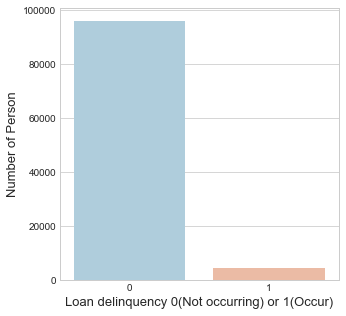

In [3]:
grouped = train['TARGET'].value_counts()
sns.set_style('whitegrid')
f, ax = plt.subplots(figsize=(5, 5))
sns.barplot(grouped.index, grouped.values, palette='RdBu_r')
plt.ylabel('Number of Person', fontsize=13)
plt.xlabel('Loan delinquency 0(Not occurring) or 1(Occur)', fontsize=13)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

(한글)변수명 리스트 생성 :data_name 

In [4]:
data_info = pd.read_excel('data_info.xlsx')
data_name_list = dict(data_info['변수명'])

변수의 한글 뜻이 알고 싶을 때 사용하는 함수

In [5]:
def val(i):
    try:
        return (data_name_list[train_list.index(i)])
    except:
        return i

train 데이터프레임 컬럼 리스트 생성 : train_list

In [6]:
train_c = train.copy()

In [7]:
train_list = list(train_c.columns)

# 2. Preprocessing

1) y(대출연체)값과 인자로 넘어온 변수를 그룹화 하여 변수별 y값을 카운팅 해서 막대그래프를 그리는 함수

In [8]:
def bar_plot(x_val):
    dia_yn = (train_c.groupby([x_val, 'TARGET']).size())
    dia_yn.unstack('TARGET').iplot(kind='bar', title = val(x_val))

2) 인자로 넘어온 변수 2개를 그룹화 하여 막대 그래프를 그리는 함수

In [9]:
def bar_plot2(x_val,y_val):
    dia_yn = (train_c.groupby([x_val, y_val]).size())
    dia_yn.unstack(y_val).iplot(kind='bar', title = val(x_val))

3)y(대출연체)값과 인자로 넘어온 변수를 그룹화하여 대출 연체와 미연체 확률을 막대그래프를 그리는  함수

In [10]:
def bar_percent(var_x):
    name_x = val(var_x)
    dia_yn = (train_c.groupby([var_x, 'TARGET']).size())
    df = train_c.groupby(var_x)[var_x].size()
    a = dia_yn.unstack('TARGET')
    df = pd.DataFrame(df)
    merge_df = pd.merge(a,df , left_index=True ,right_index=True)
    merge_df['대출 미연체 비율'] = merge_df[0]/merge_df[var_x] * 100
    merge_df['대출 연체 비율'] = merge_df[1]/merge_df[var_x] * 100
    mer_df_percent = merge_df.iloc[:,3:]
    mer_df_percent.iplot(kind='bar',barmode='stack' ,title = name_x+'별 연체 비율')

4)y(대출연체)값과 인자로 넘어온 변수를 그룹화하여 데이터프레임 반환 시키는 함수

In [11]:
def target_percent(var_x):
    name_x = val(var_x)
    dia_yn = (train_c.groupby([var_x, 'TARGET']).size())
    df = train_c.groupby(var_x)[var_x].size()
    a = dia_yn.unstack('TARGET')
    df = pd.DataFrame(df)
    merge_df = pd.merge(a,df , left_index=True ,right_index=True)
    merge_df['대출 미연체 비율'] = merge_df[0]/merge_df[var_x] * 100
    merge_df['대출 연체 비율'] = merge_df[1]/merge_df[var_x] * 100
    return merge_df['대출 연체 비율']

5)인자로 받은 2변수를 x,y 값으로 하는 boxplot을 그리는 함수

In [12]:
def display_boxplot(feature, feature2):
    plt.figure(figsize =(15,8))
    with plt.style.context(('seaborn-white')):
        sns.boxplot(x=train_c[feature], y=train_c[feature2], linewidth=2, palette="Set1")
    matplotlib.rc('font',family="Arial")
    plt.show()

In [13]:
def box_plot(x_val):
    dia_yn = train_c[x_val].loc[train_c[x_val] != 0]
    dia_yn.iplot(kind='box', title = val(x_val))

In [14]:
def val_cnt(args):
    cnt = dict(train_c[args].value_counts())
    return cnt.keys()

## (1) 데이터 중 NA 값을 가지고 있는 변수

In [15]:
def nan(i):
    if len(train_c[i][lambda x: x.isnull()]) != 0:
        if train_list.index(i) <= 68:
            print ("col : {} - {},num : {}".format(i,data_name_list[train_list.index(i)],len(train_c[i][lambda x: x.isnull()]) ))
        else :
            print ("col : {} - new_feature ,num : {}".format(i,len(train_c[i][lambda x: x.isnull()]) ))


In [16]:
for i in train_list:
    nan(i)

col : OCCP_NAME_G - 직업,num : 464
col : LAST_CHLD_AGE - 막내자녀나이,num : 1027
col : MATE_OCCP_NAME_G - 배우자직업,num : 45709
col : TEL_MBSP_GRAD - 멤버쉽등급,num : 46015
col : PAYM_METD - 납부방법,num : 2833


In [17]:
pd.set_option('display.max_columns', 100)

1)직업 정보가 NAN 값인 데이터 : 464

    -  추정소득 정보 보유  --> 'NA_JOB_INFO' 으로 NAN 값을 채운다
    -  추정소득 정보 미보유 --> 'NA_INFO' 으로 NAN 값을 채운다

In [18]:
train_c[lambda x: x.OCCP_NAME_G.isnull()].head(3)
#a.loc[a['ACTL_FMLY_NUM'] ==1]

CUST_ID  TARGET  BNK_LNIF_CNT  CPT_LNIF_CNT  SPART_LNIF_CNT  \
180      182       0             1             0               0   
363      368       0             1             0               0   
377      382       0             0             0               1   

     ECT_LNIF_CNT  TOT_LNIF_AMT  TOT_CLIF_AMT  BNK_LNIF_AMT  CPT_LNIF_AMT  \
180             1        153001        153001         72001             0   
363             0        246001             0        246001             0   
377             1         18001         18001             0             0   

     CRDT_OCCR_MDIF  SPTCT_OCCR_MDIF  CRDT_CARD_CNT  CTCD_OCCR_MDIF  \
180               1                0              4              97   
363               1                0              2             121   
377               1                1              3             121   

     CB_GUIF_CNT  CB_GUIF_AMT OCCP_NAME_G  CUST_JOB_INCM  HSHD_INFR_INCM  \
180            0            0         NaN           4100            6300   
363            0            0         NaN              0            2400   
377            0            0         NaN           5200            5200   

     ACTL_FMLY_NUM  CUST_FMLY_NUM  LAST_CHLD_AGE MATE_OCCP_NAME_G  \
180              1              1            0.0              NaN   
363              1              1            0.0              NaN   
377              1              1            0.0              NaN   

     MATE_JOB_INCM  CRDT_LOAN_CNT  MIN_CNTT_DATE  TOT_CRLN_AMT  TOT_REPY_AMT  \
180              0              0              0             0             0   
363              0              0              0             0             0   
377              0              0              0             0             0   

     CRLN_OVDU_RATE  CRLN_30OVDU_RATE  LT1Y_CLOD_RATE  STRT_CRDT_GRAD  \
180               0                 0               0               0   
363               0                 0               0               0   
377               0                 0               0               0   

     LTST_CRDT_GRAD  PREM_OVDU_RATE LT1Y_PEOD_RATE  AVG_STLN_RATE  \
180               0               0              0              0   
363               0               0              0              0   
377               0               3           10미만              0   

     STLN_REMN_AMT  LT1Y_STLN_AMT  LT1Y_SLOD_RATE  GDINS_MON_PREM  \
180              0              0               0          790000   
363              0              0               0               0   
377              0              0               0               0   

     SVINS_MON_PREM  FMLY_GDINS_MNPREM  FMLY_SVINS_MNPREM  MAX_MON_PREM  \
180               0             790000                  0        790000   
363               0                  0                  0             0   
377           30000                  0              30000         30000   

     TOT_PREM  FMLY_TOT_PREM  CNTT_LAMT_CNT  LT1Y_CTLT_CNT  AUTR_FAIL_MCNT  \
180   3000000        3000000              0              0               0   
363   1000000        1000000              0              0               0   
377   1000000        1000000              0              0               1   

     FYCM_PAID_AMT  FMLY_CLAM_CNT  FMLY_PLPY_CNT AGE SEX  AVG_CALL_TIME  \
180              0              0              0  35   1            135   
363              0              0              1  65   2            167   
377              0              0              0  45   2            769   

     AVG_CALL_FREQ TEL_MBSP_GRAD   ARPU  MON_TLFE_AMT CBPT_MBSP_YN  \
180              0             R  50000             0            N   
363            252             R  50000         50000            N   
377            335             R  60000        540000            Y   

     MOBL_FATY_PRC  TEL_CNTT_QTR  NUM_DAY_SUSP  CRMM_OVDU_AMT  TLFE_UNPD_CNT  \
180              0         20131             0              0              0   
363         900000         20121

In [19]:
train_c['OCCP_NAME_G'].fillna(0, inplace=True)

In [20]:
train_c['index'] =  pd.DataFrame(np.array(train_c['CUST_ID'].index))

- 추정소득 정보 보유  --> 'NA_JOB_INFO' 으로 NAN 값을 채운다

In [21]:
train_c['OCCP_NAME_G'] = train_c['index'].apply(lambda x: 'NA_JOB_INFO' \
                                if (train_c['OCCP_NAME_G'][x] == 0 )&(train_c['CUST_JOB_INCM'][x] != 0) \
                                                else train_c['OCCP_NAME_G'][x] )

- 추정소득 정보 미보유 --> 'NA_INFO' 으로 NAN 값을 채운다

In [22]:
train_c['OCCP_NAME_G'] = train_c['index'].apply(lambda x: 'NA_INFO' \
                                if (train_c['OCCP_NAME_G'][x] == 0 ) else train_c['OCCP_NAME_G'][x] )

box_plot('OCCP_NAME_G')

In [23]:
bar_percent('OCCP_NAME_G')

2)막내자녀나이가 NAN 값인 데이터 :1027
    - 막내자녀가 없다는 가정으로 모두 0 으로 값을 채운다

In [24]:
train_c['LAST_CHLD_AGE'].fillna(0, inplace=True)

3)배우자직업이 NAN 값인 데이터 : 45709

    - 배우자가 없어서 배우자 직업란이 NA 인 경우 --> 'NA_INFO' 으로 채운다
    - 배우자의 추정소득은 있지만 배우자 직업 정보가 없어서 NA 인 경우 --> 'NA_JOB_INFO' 으로 채운다

In [25]:
train_c['MATE_OCCP_NAME_G'].fillna(0, inplace=True)

- 배우자의 추정소득은 있지만 배우자 직업 정보가 없어서 NA 인 경우 --> 'NA_JOB_INFO'

In [26]:
train_c['MATE_OCCP_NAME_G'] = train_c['index'].apply(lambda x: 'NA_JOB_INFO' \
                                if (train_c['MATE_OCCP_NAME_G'][x] == 0 )&(train_c['MATE_JOB_INCM'][x] != 0) \
                                                else train_c['MATE_OCCP_NAME_G'][x] )

- 배우자가 없어서 배우자 직업란이 NA 인 경우 --> 'NA_INFO'

In [27]:
train_c['MATE_OCCP_NAME_G'] = train_c['index'].apply(lambda x: 'NA_INFO' \
                                if (train_c['MATE_OCCP_NAME_G'][x] == 0 ) else train_c['MATE_OCCP_NAME_G'][x] )

In [28]:
bar_percent('MATE_OCCP_NAME_G')

4)멤버쉽등급 값이 NA인 경우 :46015

In [29]:
train_c['TEL_MBSP_GRAD'].fillna('NA_INFO', inplace=True)

In [30]:
bar_percent('TEL_MBSP_GRAD')

5)납부방법 값이 NA인 경우 : 2833

In [31]:
train_c['PAYM_METD'].fillna('NA_INFO', inplace=True)

In [32]:
bar_percent('PAYM_METD')

In [33]:
for i in train_list:
    nan(i)

## (2) 데이터 중 int형 0 or str형 0을 가지고 있는 변수 

In [34]:
int_zero = {}  #50
str_zero = {}  #1

In [35]:
def zero(i):
    #print (i)
    a = dict(train_c[i].value_counts())
    keys = list(a.keys())
    if 0 in keys:
        int_zero[i] = keys
    elif '0' in keys:
        str_zero[i] = keys

In [36]:
for i in train_list:
    zero(i)

1)최초 신용 등급

    - 최초 신용 등급 정보가 없는 경우 : 96403 
    - 데이터에서는 신용 등급 정보가 없는 경우 모두 0등급 처리

In [37]:
bar_plot('STRT_CRDT_GRAD')

- 최초신용 등급별 연체 비율에 따라서 0등급을 다른 등급으로 대체 해준다 (** 특이점 : 1등급의 대출연체 비율이 높음)

    - 0 등급 고객들의 대출 연체 비율 : 4.24(셋째 자리 반올림)
        
    -->3등급 고객들의 대출 연체 비율 : 4.29(셋째 자리 반올림) 으로 대체 , 대부분의 데이터가 0이므로 중위수나 평균 값을 사용 하지 않음

In [38]:
bar_percent('STRT_CRDT_GRAD')

In [39]:
train_c['STRT_CRDT_GRAD'].value_counts()

0    96403
5      912
4      900
3      723
2      548
6      503
1      199
7       45
Name: STRT_CRDT_GRAD, dtype: int64

- 0등급 고객 3등급 으로 변환

In [40]:
val_cnt('STRT_CRDT_GRAD')

dict_keys([0, 5, 4, 3, 2, 6, 1, 7])

In [41]:
val_cnt('LTST_CRDT_GRAD')

dict_keys([0, 6, 5, 4, 7, 8, 3, 2, 10, 9, 1])

In [42]:
train_c['STRT_CRDT_GRAD'] = train_c['index'].apply(lambda x: 3 \
                                if (train_c['STRT_CRDT_GRAD'][x] == 0 ) \
                                                else train_c['STRT_CRDT_GRAD'][x] )

2)최근 신용 등급

    - 최근 신용 등급 정보가 없는 경우 :94960 
    - 최초 신용 등급과 마찬가지로 거의 모든 고객의 신용 등급을 가지고 있지 않음

- 최근 신용 등급별 연체 비율에 따라서 0등급을 다른 등급으로 대체 해준다 (** 특이점 : 1등급의 대출연체 비율이 높음)

    - 0 등급 고객들의 대출 연체 비율 : 4.22(셋째 자리 반올림)
        
    -->4등급 고객들의 대출 연체 비율 : 4.11(셋째 자리 반올림) 으로 대체 , 대부분의 데이터가 0이므로 중위수나 평균 값을 사용 하지 않음

In [43]:
bar_percent('LTST_CRDT_GRAD')

In [44]:
train_c['LTST_CRDT_GRAD'] = train_c['index'].apply(lambda x: 4 \
                                if (train_c['LTST_CRDT_GRAD'][x] == 0 ) \
                                                else train_c['LTST_CRDT_GRAD'][x] )

In [45]:
train_c['LTST_CRDT_GRAD'].value_counts()

4     95788
6      1296
5      1122
7       654
8       415
3       274
2       272
10      209
9       141
1        62
Name: LTST_CRDT_GRAD, dtype: int64

3)추정소득

    - 직업 정보가 있는 경우 직업에 따라 추정 소득 값을 대체 한다
    - 직업 정보가 없는 경우 그대로 0으로 둔다

- 직업이 2차 분류군 (직업의 범위가 넓음)이므로 직업별로 소득 범위의 차가 넓고 이상치가 많음

    - 이상치의 영향을 덜 받고 직업별로 값을 대표할만한 값으로 <b>중위수</b>를 선택 한다

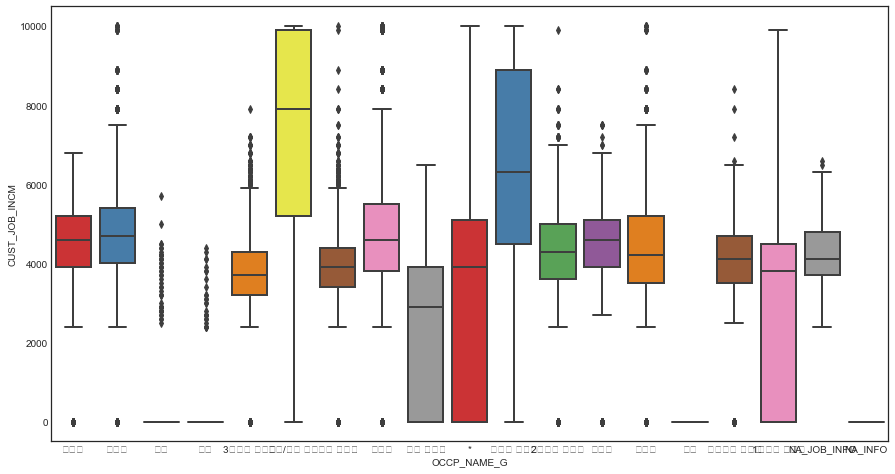

In [46]:
display_boxplot('OCCP_NAME_G','CUST_JOB_INCM')

In [47]:
train_n = train_c.groupby(['OCCP_NAME_G'])['CUST_JOB_INCM'].median().to_frame('JOB_MEDIAN')
train_n = train_n.reset_index()

남편의 직업, 추정소득 컬럼, 부인의 직업, 추정 소득 컬럼 생성 하기

In [48]:
train_c['SEX'].value_counts()

2    54490
1    45313
*      430
Name: SEX, dtype: int64

In [49]:
train_c.loc[train_c['SEX'] == '*'].head()

CUST_ID  TARGET  BNK_LNIF_CNT  CPT_LNIF_CNT  SPART_LNIF_CNT  \
22        23       0             0             0               1   
23        24       0             0             1               2   
165      167       0             0             0               1   
276      280       0             0             4               4   
288      292       0             1             0               0   

     ECT_LNIF_CNT  TOT_LNIF_AMT  TOT_CLIF_AMT  BNK_LNIF_AMT  CPT_LNIF_AMT  \
22              1        180001        180001             0             0   
23              1         51001             0             0             1   
165             1        192001             0             0             0   
276             0         90001             0             0         90001   
288             0             1             1             1             0   

     CRDT_OCCR_MDIF  SPTCT_OCCR_MDIF  CRDT_CARD_CNT  CTCD_OCCR_MDIF  \
22               25               85              0               0   
23                0                0              1             121   
165               0                0              2              73   
276               0                0              5             121   
288              13                0              0               0   

     CB_GUIF_CNT  CB_GUIF_AMT OCCP_NAME_G  CUST_JOB_INCM  HSHD_INFR_INCM  \
22             0            0           *           3700            7400   
23             0            0           *              0               0   
165            0            0           *           8900           13900   
276            0            0           *           4200            9500   
288            0            0           *           3100            7000   

     ACTL_FMLY_NUM  CUST_FMLY_NUM  LAST_CHLD_AGE MATE_OCCP_NAME_G  \
22               5              2            0.0                *   
23               2              1            0.0               주부   
165              2              1            0.0                *   
276              5              2            0.0                *   
288              3              1            0.0          NA_INFO   

     MATE_JOB_INCM  CRDT_LOAN_CNT  MIN_CNTT_DATE  TOT_CRLN_AMT  TOT_REPY_AMT  \
22            3700              0              0             0             0   
23               0              0              0             0             0   
165           4900              0              0             0             0   
276           5400              0              0             0             0   
288              0              0              0             0             0   

     CRLN_OVDU_RATE  CRLN_30OVDU_RATE  LT1Y_CLOD_RATE  STRT_CRDT_GRAD  \
22                0                 0               0               3   
23                0                 0               0               3   
165               0                 0               0               3   
276               0                 0               0               3   
288               0                 0               0               3   

     LTST_CRDT_GRAD  PREM_OVDU_RATE LT1Y_PEOD_RATE  AVG_STLN_RATE  \
22                4              22           30미만              0   
23                4               0              0              0   
165               4               3              0              0   
276               4              12           20미만             83   
288               4              10           20미만              0   

     STLN_REMN_AMT  LT1Y_STLN_AMT  LT1Y_SLOD_RATE  GDINS_MON_PREM  \
22               0              0               0           90000   
23               0              0               0               0   
165              0              0               0           70000   
276        7000000        4000000              10               0   
288              0              0               0          390000   

     SVINS_MON_PREM  FMLY_GDINS_MNPREM  FMLY_SVINS_MNPREM  MAX_MON_PREM  \
22       

In [50]:
a = ['CUST_ID','OCCP_NAME_G','CUST_JOB_INCM']
b = ['CUST_ID','MATE_OCCP_NAME_G','MATE_JOB_INCM']

In [51]:
occp_m = train_c.loc[train_c['SEX'] == '1'][a]
occp_m.columns = ["CUST_ID", "HUSB_JOB", "HUSB_INCM"]

In [52]:
occp_f = train_c.loc[train_c['SEX'] == '2'][a]
occp_f.columns = ["CUST_ID", "WIFE_JOB", "WIFE_INCM"]

In [53]:
mate_m = train_c.loc[train_c['SEX'] == '1'][b]
mate_m.columns = ["CUST_ID", "WIFE_JOB", "WIFE_INCM"]
mate_f = train_c.loc[train_c['SEX'] == '2'][b]
mate_f.columns = ["CUST_ID", "HUSB_JOB", "HUSB_INCM"]

In [54]:
occp_male = pd.concat([occp_m, mate_f])

In [55]:
occp_female = pd.concat([occp_f, mate_m])

In [56]:
occp_merge = pd.merge(occp_male,occp_female , on='CUST_ID',how='left')
occp_merge.shape

(99803, 5)

In [57]:
train_new = train_c['CUST_ID'].copy()

In [58]:
train_new = train_new.reset_index()

In [59]:
train_new = pd.merge(train_new , occp_merge , on='CUST_ID' , how ='left')

In [60]:
occp_merge['HUSB_JOB'].value_counts()

NA_INFO        24683
주부             18622
사무직            13056
2차산업 종사자        8925
자영업             7744
3차산업 종사자        5918
공무원             3692
전문직             3484
단순 사무직          2590
운전직             2551
학생              1823
1차산업 종사자        1335
기타              1063
기업/단체 임원        1011
고소득 전문직          877
*                759
예체능계 종사자         671
단순 노무직           650
NA_JOB_INFO      349
Name: HUSB_JOB, dtype: int64

In [61]:
train_c = pd.merge(train_c , occp_merge , on='CUST_ID' , how ='left')

In [62]:
bar_percent('HUSB_JOB')

In [63]:
bar_percent('WIFE_JOB')

새로운 변수를 생성 하면서 직업에 *(비식별) 정보로 인해 NA 값이 생김 
    
    - 직업정보 : 모두 * 로 채워 줌
    - 추정 소득 : 직업별 추정 소득 중위수

In [64]:
train_list = list(train_c.columns)

In [65]:
for i in train_list:
    nan(i)

col : HUSB_JOB - new_feature ,num : 430
col : HUSB_INCM - new_feature ,num : 430
col : WIFE_JOB - new_feature ,num : 430
col : WIFE_INCM - new_feature ,num : 430


In [66]:
train_c.tail()

CUST_ID  TARGET  BNK_LNIF_CNT  CPT_LNIF_CNT  SPART_LNIF_CNT  \
100228   102248       0             1             0               2   
100229   102249       0             2             0               0   
100230   102250       0             1             0               0   
100231   102251       0             0             0               1   
100232   102252       0             1             0               0   

        ECT_LNIF_CNT  TOT_LNIF_AMT  TOT_CLIF_AMT  BNK_LNIF_AMT  CPT_LNIF_AMT  \
100228             2         75001         15001         57001             0   
100229             0         54001          9001         54001             0   
100230             0         27001         27001         27001             0   
100231             1         57001             0             0             0   
100232             0         18001         18001         18001             0   

        CRDT_OCCR_MDIF  SPTCT_OCCR_MDIF  CRDT_CARD_CNT  CTCD_OCCR_MDIF  \
100228              37              109              5             121   
100229              85                0              6             121   
100230               1                0              2             121   
100231               1                1              3             121   
100232              49                0              4             121   

        CB_GUIF_CNT  CB_GUIF_AMT OCCP_NAME_G  CUST_JOB_INCM  HSHD_INFR_INCM  \
100228            0            0         자영업           5500           12900   
100229            0            0         운전직           4600            9800   
100230            0            0         자영업           4800           10400   
100231            0            0         사무직           4200            4200   
100232            0            0         사무직           6000            9900   

        ACTL_FMLY_NUM  CUST_FMLY_NUM  LAST_CHLD_AGE MATE_OCCP_NAME_G  \
100228              3              3           34.0              자영업   
100229              5              2           19.0         1차산업 종사자   
100230              4              2           14.0              운전직   
100231              1              1            0.0          NA_INFO   
100232              4              2           24.0              사무직   

        MATE_JOB_INCM  CRDT_LOAN_CNT  MIN_CNTT_DATE  TOT_CRLN_AMT  \
100228              0              0              0             0   
100229           5200              0              0             0   
100230           5600              0              0             0   
100231              0              0              0             0   
100232           4000              0              0             0   

        TOT_REPY_AMT  CRLN_OVDU_RATE  CRLN_30OVDU_RATE  LT1Y_CLOD_RATE  \
100228             0               0                 0               0   
100229             0               0                 0               0   
100230             0               0                 0               0   
100231             0               0                 0               0   
100232             0               0                 0               0   

        STRT_CRDT_GRAD  LTST_CRDT_GRAD  PREM_OVDU_RATE LT1Y_PEOD_RATE  \
100228               3               4               1           10미만   
100229               3               4               5              0   
100230               3               4               8              0   
100231               3               4               0              0   
100232               3               4               0              0   

        AVG_STLN_RATE  STLN_REMN_AMT  LT1Y_STLN_AMT  LT1Y_SLOD_RATE  \
100228              0              0              0               0   
100229              0              0              0               0   
100230              0              0              0               0   
100231              0              0              0               0   
100232              0              0              0               0   

        GDINS_MON_PRE

In [67]:
train_c['HUSB_JOB'].fillna('*', inplace=True)
train_c['HUSB_INCM'].fillna(0, inplace=True)
train_c['WIFE_JOB'].fillna('*', inplace=True)
train_c['WIFE_INCM'].fillna(0, inplace=True)

남편과 아내의 직업군별 연체 확률 컬럼 만들기

In [68]:
husb_per = dict(target_percent('HUSB_JOB'))

In [69]:
train_c['HUSB_TARGET'] = train_c['HUSB_JOB'].apply(lambda x : husb_per[x])
train_c['WIFE_TARGET'] = train_c['WIFE_JOB'].apply(lambda x : husb_per[x])

In [70]:
train_c['HUSB_JOB'].value_counts()

NA_INFO        24683
주부             18622
사무직            13056
2차산업 종사자        8925
자영업             7744
3차산업 종사자        5918
공무원             3692
전문직             3484
단순 사무직          2590
운전직             2551
학생              1823
1차산업 종사자        1335
*               1189
기타              1063
기업/단체 임원        1011
고소득 전문직          877
예체능계 종사자         671
단순 노무직           650
NA_JOB_INFO      349
Name: HUSB_JOB, dtype: int64

In [71]:
h_occp = pd.DataFrame(train_c.groupby(['HUSB_JOB'])['HUSB_INCM'].median())
h_occp = h_occp.reset_index()

In [72]:
w_occp = pd.DataFrame(train_c.groupby(['WIFE_JOB'])['WIFE_INCM'].median())
w_occp = w_occp.reset_index()

In [73]:
occp_m =pd.DataFrame(train_c.groupby(['OCCP_NAME_G'])['CUST_JOB_INCM'].median())
occp_m = occp_m.reset_index()

In [74]:
occp_f =pd.DataFrame(train_c.groupby(['MATE_OCCP_NAME_G'])['MATE_JOB_INCM'].median())
occp_f = occp_f.reset_index()

- 직업군 별로 남녀 추정소득의 중위수 값 비교 
    
    - 가입자, 배우자로 나눈 추정 소득의 중위수 값 차 와 남녀로 나눈 추정 소득의 중위수 값의 차 거의 없음
    - <b>비식별 고객</b>의 추정 소득을 가진 가입자, 배우자의 직업군별 추정 소득의 중위수 값을 대체 값으로 사용

In [75]:
import plotly.plotly as py
from plotly.graph_objs import *

py.iplot({
    'data': [
        Bar(**{
            'x': h_occp['HUSB_JOB'],
            'y': h_occp['HUSB_INCM'],
            'name': '남자',
            'type': 'bar'
        }),
        Bar(**{
            'x': w_occp['WIFE_JOB'],
            'y': w_occp['WIFE_INCM'],
            'name': '여자',
            'type': 'bar'
        }),
        
        Bar(**{
            'x': occp_m['OCCP_NAME_G'],
            'y': occp_m['CUST_JOB_INCM'],
            'name': '가입자',
            'type': 'bar'
        }),
        Bar(**{
            'x': occp_f['MATE_OCCP_NAME_G'],
            'y': occp_f['MATE_JOB_INCM'],
            'name': '배우자',
            'type': 'bar'
        })
    ],
    'layout': Layout(**{
        'title': '직업별 추정소득 (중위수)'
    })
}, )

- 직업 정보가 있는 경우 직업에 따라 추정 소득 값을 대체 한다

In [76]:
# 가입자 
occp_1 = dict(train.groupby(['OCCP_NAME_G'])['CUST_JOB_INCM'].median())
# 배우자
occp_2 = dict(train.groupby(['MATE_OCCP_NAME_G'])['MATE_JOB_INCM'].median())

In [77]:
train_c['CUST_JOB_INCM'] = train_c['index'].apply(lambda x: occp_1[train_c['OCCP_NAME_G'][x]] \
                                if (train_c['CUST_JOB_INCM'][x] == 0)&\
                                (train_c['OCCP_NAME_G'][x]!= 'NA_INFO' ) else train_c['CUST_JOB_INCM'][x] )

In [78]:
train_c['MATE_JOB_INCM'] = train_c['index'].apply(lambda x: occp_2[train_c['MATE_OCCP_NAME_G'][x]] \
                                if (train_c['MATE_JOB_INCM'][x] == 0)&\
                                (train_c['MATE_OCCP_NAME_G'][x]!= 'NA_INFO' ) else train_c['MATE_JOB_INCM'][x] )

In [79]:
train_c.tail()

CUST_ID  TARGET  BNK_LNIF_CNT  CPT_LNIF_CNT  SPART_LNIF_CNT  \
100228   102248       0             1             0               2   
100229   102249       0             2             0               0   
100230   102250       0             1             0               0   
100231   102251       0             0             0               1   
100232   102252       0             1             0               0   

        ECT_LNIF_CNT  TOT_LNIF_AMT  TOT_CLIF_AMT  BNK_LNIF_AMT  CPT_LNIF_AMT  \
100228             2         75001         15001         57001             0   
100229             0         54001          9001         54001             0   
100230             0         27001         27001         27001             0   
100231             1         57001             0             0             0   
100232             0         18001         18001         18001             0   

        CRDT_OCCR_MDIF  SPTCT_OCCR_MDIF  CRDT_CARD_CNT  CTCD_OCCR_MDIF  \
100228              37              109              5             121   
100229              85                0              6             121   
100230               1                0              2             121   
100231               1                1              3             121   
100232              49                0              4             121   

        CB_GUIF_CNT  CB_GUIF_AMT OCCP_NAME_G  CUST_JOB_INCM  HSHD_INFR_INCM  \
100228            0            0         자영업           5500           12900   
100229            0            0         운전직           4600            9800   
100230            0            0         자영업           4800           10400   
100231            0            0         사무직           4200            4200   
100232            0            0         사무직           6000            9900   

        ACTL_FMLY_NUM  CUST_FMLY_NUM  LAST_CHLD_AGE MATE_OCCP_NAME_G  \
100228              3              3           34.0              자영업   
100229              5              2           19.0         1차산업 종사자   
100230              4              2           14.0              운전직   
100231              1              1            0.0          NA_INFO   
100232              4              2           24.0              사무직   

        MATE_JOB_INCM  CRDT_LOAN_CNT  MIN_CNTT_DATE  TOT_CRLN_AMT  \
100228           4900              0              0             0   
100229           5200              0              0             0   
100230           5600              0              0             0   
100231              0              0              0             0   
100232           4000              0              0             0   

        TOT_REPY_AMT  CRLN_OVDU_RATE  CRLN_30OVDU_RATE  LT1Y_CLOD_RATE  \
100228             0               0                 0               0   
100229             0               0                 0               0   
100230             0               0                 0               0   
100231             0               0                 0               0   
100232             0               0                 0               0   

        STRT_CRDT_GRAD  LTST_CRDT_GRAD  PREM_OVDU_RATE LT1Y_PEOD_RATE  \
100228               3               4               1           10미만   
100229               3               4               5              0   
100230               3               4               8              0   
100231               3               4               0              0   
100232               3               4               0              0   

        AVG_STLN_RATE  STLN_REMN_AMT  LT1Y_STLN_AMT  LT1Y_SLOD_RATE  \
100228              0              0              0               0   
100229              0              0              0               0   
100230              0              0              0               0   
100231              0              0              0               0   
100232              0              0              0               0   

        GDINS_MON_PRE

In [80]:
train_c['HUSB_INCM'] = train_c['index'].apply(lambda x: occp_1[train_c['HUSB_JOB'][x]] \
                                if (train_c['HUSB_INCM'][x] == 0)&\
                                (train_c['HUSB_JOB'][x]!= 'NA_INFO' ) else train_c['HUSB_INCM'][x] )

In [81]:
train_c['WIFE_INCM'] = train_c['index'].apply(lambda x: occp_1[train_c['WIFE_JOB'][x]] \
                                if (train_c['WIFE_INCM'][x] == 0)&\
                                (train_c['WIFE_JOB'][x]!= 'NA_INFO' ) else train_c['WIFE_INCM'][x] )

#### 변수 생성 시 값을 나누는데 문제가 생길 수 있으므로 모든 금액 컬럼의 데이터에 +1 을 해 준다.

    -TOT_CLIF_AMT	대출정보 현재 총 금액[신용대출]
    -BNK_LNIF_AMT	대출정보 현재 총 금액[은행]
    -CPT_LNIF_AMT	대출정보 현재 총 금액[카드사/할부사/캐피탈]
    -CB_GUIF_AMT	 보증정보 현재 보증 총 금액

In [82]:
train_c.tail()

CUST_ID  TARGET  BNK_LNIF_CNT  CPT_LNIF_CNT  SPART_LNIF_CNT  \
100228   102248       0             1             0               2   
100229   102249       0             2             0               0   
100230   102250       0             1             0               0   
100231   102251       0             0             0               1   
100232   102252       0             1             0               0   

        ECT_LNIF_CNT  TOT_LNIF_AMT  TOT_CLIF_AMT  BNK_LNIF_AMT  CPT_LNIF_AMT  \
100228             2         75001         15001         57001             0   
100229             0         54001          9001         54001             0   
100230             0         27001         27001         27001             0   
100231             1         57001             0             0             0   
100232             0         18001         18001         18001             0   

        CRDT_OCCR_MDIF  SPTCT_OCCR_MDIF  CRDT_CARD_CNT  CTCD_OCCR_MDIF  \
100228              37              109              5             121   
100229              85                0              6             121   
100230               1                0              2             121   
100231               1                1              3             121   
100232              49                0              4             121   

        CB_GUIF_CNT  CB_GUIF_AMT OCCP_NAME_G  CUST_JOB_INCM  HSHD_INFR_INCM  \
100228            0            0         자영업           5500           12900   
100229            0            0         운전직           4600            9800   
100230            0            0         자영업           4800           10400   
100231            0            0         사무직           4200            4200   
100232            0            0         사무직           6000            9900   

        ACTL_FMLY_NUM  CUST_FMLY_NUM  LAST_CHLD_AGE MATE_OCCP_NAME_G  \
100228              3              3           34.0              자영업   
100229              5              2           19.0         1차산업 종사자   
100230              4              2           14.0              운전직   
100231              1              1            0.0          NA_INFO   
100232              4              2           24.0              사무직   

        MATE_JOB_INCM  CRDT_LOAN_CNT  MIN_CNTT_DATE  TOT_CRLN_AMT  \
100228           4900              0              0             0   
100229           5200              0              0             0   
100230           5600              0              0             0   
100231              0              0              0             0   
100232           4000              0              0             0   

        TOT_REPY_AMT  CRLN_OVDU_RATE  CRLN_30OVDU_RATE  LT1Y_CLOD_RATE  \
100228             0               0                 0               0   
100229             0               0                 0               0   
100230             0               0                 0               0   
100231             0               0                 0               0   
100232             0               0                 0               0   

        STRT_CRDT_GRAD  LTST_CRDT_GRAD  PREM_OVDU_RATE LT1Y_PEOD_RATE  \
100228               3               4               1           10미만   
100229               3               4               5              0   
100230               3               4               8              0   
100231               3               4               0              0   
100232               3               4               0              0   

        AVG_STLN_RATE  STLN_REMN_AMT  LT1Y_STLN_AMT  LT1Y_SLOD_RATE  \
100228              0              0              0               0   
100229              0              0              0               0   
100230              0              0              0               0   
100231              0              0              0               0   
100232              0              0              0               0   

        GDINS_MON_PRE

In [83]:
def AMT_PLUS(args):
    train_c[args] = train_c[args].apply(lambda x: x+1)

In [84]:
def val_cnt(args):
    cnt = dict(train_c[args].value_counts())
    return cnt.keys()

In [85]:
for i in train_list:
    if i[-3:] == 'AMT':
        if 0 in val_cnt(i):
            AMT_PLUS(i)
            print (i)

TOT_CLIF_AMT
BNK_LNIF_AMT
CPT_LNIF_AMT
CB_GUIF_AMT
TOT_CRLN_AMT
TOT_REPY_AMT
STLN_REMN_AMT
LT1Y_STLN_AMT
FYCM_PAID_AMT
MON_TLFE_AMT
CRMM_OVDU_AMT
LT1Y_MXOD_AMT


# 3. 변수 생성

### < <i>SCI Data</i> >

(1)대출 총 건수 , TOT_LNIF_CNT 

    TOT_LNIF_CNT = BNK_LNIF_CNT + CPT_LNIF_CNT + SPART_LNIF_CNT + ECT_LNIF_CNT

In [86]:
train_c = train_c.assign(TOT_LNIF_CNT = lambda x : x.BNK_LNIF_CNT + x.CPT_LNIF_CNT + x.SPART_LNIF_CNT + x.ECT_LNIF_CNT)

In [87]:
bar_plot('TOT_LNIF_CNT')

2.건당 평균 대출 금액 , AVG_LNIF_AMT

    - 총 대출 금액 / (총 대출 건수 +0.00001): 총 대출 건수가 0 인 값 대비

In [88]:
train_c = train_c.assign(AVG_LNIF_AMT = lambda x : x.TOT_LNIF_AMT/(x.TOT_LNIF_CNT+0.00001))

3.대출 총 금액에서 신용 대출 금액의 비율  , PER_CLIF_AMT

    TOT_CLIF_AMT/TOT_LNIF_AMT*100
    - 좋다고 확답 할 수 없음

In [89]:
train_c = train_c.assign(PER_CLIF_AMT = lambda x : (x.TOT_CLIF_AMT/x.TOT_LNIF_AMT)*100)

In [90]:
def total(args):
    if train_c['TOT_LNIF_AMT'].all() < train_c[args].all() :
        return args

4.대출 총 건수에서 [카드사/할부사/캐피탈] 대출 금액의 비율 , PER_CPT_AMT

    CPT_LNIF_AMT/TOT_CLIF_AMT*100

In [91]:
train_c = train_c.assign(PER_CPT_AMT = lambda x : (x.CPT_LNIF_AMT/x.TOT_CLIF_AMT)*100)

5.대출 총 건수에서 [은행] 대출 금액의 비율 , PER_BNK_AMT

    BNK_LNIF_AMT/TOT_CLIF_AMT*100

In [92]:
train_c = train_c.assign(PER_BNK_AMT = lambda x : (x.BNK_LNIF_AMT/x.TOT_CLIF_AMT)*100)

### < <i>한화 생명 보험 Data</i> >

(1)결혼 유무 , MARR_YN

    - 1인가구 이상이면서 
    - 막내 자녀가 있거나 배우자가 있는 경우 
    - 직업이 주부인 경우


In [93]:
train_c['MARR_YN'] = train_c.loc[train['ACTL_FMLY_NUM']!=1]['index'].apply( lambda x : 1 \
                                        if (train_c['LAST_CHLD_AGE'][x]!= 0)| \
                                        (train_c['MATE_OCCP_NAME_G'][x] != 'NA_INFO')| \
                                        (train_c['OCCP_NAME_G'][x] == '주부') else 0)

In [94]:
train_c['MARR_YN'].fillna(0, inplace=True)

(2) 결혼한 사람중 외벌이인 사람 , ALONE_INMC

In [95]:
train_c['ALONE_INMC'] = train_c.loc[train_c['MARR_YN'] == 1]['index'].apply( lambda x : 1 \
                                        if (train_c['HUSB_INCM'][x] != 0 and train_c['WIFE_INCM'][x] == 0)| \
                                           (train_c['HUSB_INCM'][x] == 0 and train_c['WIFE_INCM'][x] != 0)  else 0)

In [96]:
train_c['ALONE_INMC'].fillna(0, inplace=True)

In [97]:
train_list = list(train_c.columns)

In [98]:
for i in train_list:
    nan(i)

In [99]:
train_c['MARR_YN'].fillna(0, inplace=True)

### < <i>SKt Data</i> >

In [100]:
val('ARPU')

'가입자매출_원'

In [101]:
train_c['ARPU'] = train_c['ARPU'].apply(lambda x : (x+1))

    1)년 :2017 - int(str(train_c['TEL_CNTT_QTR'][0])[:4])
    2)월 :3 - int(str(train_c['TEL_CNTT_QTR'][0])[4])

In [102]:
train_c['TEL_MONTH'] =  train_c['index'].apply( lambda x :((2017 - int(str(train_c['TEL_CNTT_QTR'][x])[:4]))*12 + (3 - int(str(train_c['TEL_CNTT_QTR'][x])[4]))))


In [103]:
train_c['AVG_UNPD_CNT'] =  train_c['index'].apply( lambda x : \
                                                  round(train_c['TLFE_UNPD_CNT'][x]+0.0001)/train_c['TEL_MONTH'][x])


In [104]:
for i in train_list:
    nan(i)

In [105]:
del train_c['index']

# 4. 불필요한 변수 삭제 

In [106]:
train_dum = train_c.copy()

In [107]:
dele_val = ['OCCP_NAME_G','CUST_JOB_INCM','MATE_OCCP_NAME_G',\
            'MATE_JOB_INCM','TEL_CNTT_QTR','MOBL_PRIN','LAST_CHLD_AGE']

In [108]:
for i in dele_val:
    del train_dum[i]

# 5. 카테고리 변수 더미화

In [109]:
from sklearn.preprocessing import LabelEncoder

In [110]:
label = ['HUSB_JOB','WIFE_JOB']

In [111]:
def lbl_enc(var_x, df):
    lbl_enc = LabelEncoder()
    lbl_enc.fit(df[var_x])
    var_x_lbl = var_x+'_LABEL'
    df[var_x_lbl] = lbl_enc.transform(df[var_x])

In [112]:
for i in label:
    lbl_enc(i, train_dum)

In [113]:
train_dum[['HUSB_JOB','HUSB_JOB_LABEL','WIFE_JOB','WIFE_JOB_LABEL']].tail()

HUSB_JOB  HUSB_JOB_LABEL WIFE_JOB  WIFE_JOB_LABEL
100228       자영업              15      자영업              15
100229  1차산업 종사자               1      운전직              14
100230       자영업              15      운전직              14
100231       사무직              12  NA_INFO               4
100232       사무직              12      사무직              12

라벨 전 변수 삭제

In [114]:
for i in label:
    del train_dum[i]

In [115]:
train_dum['HUSB_JOB_LABEL'] = train_dum['HUSB_JOB_LABEL'].apply(lambda x : str(x))
train_dum['WIFE_JOB_LABEL'] = train_dum['WIFE_JOB_LABEL'].apply(lambda x : str(x))

In [116]:
train_dum  = pd.get_dummies(train_dum)

In [117]:
train_dum.head()

CUST_ID  TARGET  BNK_LNIF_CNT  CPT_LNIF_CNT  SPART_LNIF_CNT  ECT_LNIF_CNT  \
0        1       0             1             0               0             0   
1        2       0             1             0               0             0   
2        3       0             0             1               3             2   
3        4       1             0             2               4             2   
4        5       0             4             0               0             0   

   TOT_LNIF_AMT  TOT_CLIF_AMT  BNK_LNIF_AMT  CPT_LNIF_AMT  CRDT_OCCR_MDIF  \
0          9001          9002          9002             1               1   
1         24001             1         24002             1               0   
2         15001          9002             1          3002               1   
3          6001          3002             1          3002               1   
4         21001         15002         21002             1               1   

   SPTCT_OCCR_MDIF  CRDT_CARD_CNT  CTCD_OCCR_MDIF  CB_GUIF_CNT  CB_GUIF_AMT  \
0                0              2              13            3       420002   
1                0              2             121            0            1   
2               25              4             121            0            1   
3               25              4              61            0            1   
4                0              1              97            0            1   

   HSHD_INFR_INCM  ACTL_FMLY_NUM  CUST_FMLY_NUM  CRDT_LOAN_CNT  MIN_CNTT_DATE  \
0            7700              4              1              0              0   
1            8100              4              2              0              0   
2            4900              4              1              0              0   
3           10100              2              1              0              0   
4            4800              4              1              0              0   

   TOT_CRLN_AMT  TOT_REPY_AMT  CRLN_OVDU_RATE  CRLN_30OVDU_RATE  \
0             1             1               0                 0   
1             1             1               0                 0   
2             1             1               0                 0   
3             1             1               0                 0   
4             1             1               0                 0   

   LT1Y_CLOD_RATE  STRT_CRDT_GRAD  LTST_CRDT_GRAD  PREM_OVDU_RATE  \
0               0               3               4              12   
1               0               3               4              13   
2               0               3               4               2   
3               0               3               4               4   
4               0               3               4               0   

   AVG_STLN_RATE  STLN_REMN_AMT  LT1Y_STLN_AMT  LT1Y_SLOD_RATE  \
0              0              1              1               0   
1              0              1              1               0   
2              0              1              1               0   
3              0              1              1               0   
4             95        2000001              1               0   

   GDINS_MON_PREM  SVINS_MON_PREM  FMLY_GDINS_MNPREM  FMLY_SVINS_MNPREM  \
0          190000               0             190000                  0   
1               0               0             110000                  0   
2               0               0                  0                  0   
3               0               0                  0                  0   
4               0               0                  0                  0   

   MAX_MON_PREM  TOT_PREM  FMLY_TOT_PREM  CNTT_LAMT_CNT  LT1Y_CTLT_CNT  \
0        190000  20000000       20000000              0              0   
1             0   7000000       36000000              0              0   
2        100000  11000000       11000000              0              0   
3             0   4000000        4000000              0              0   
4        300000   4000000        4000000              0      

# 6. 스케일링

- minmax_scale(X): 0~1 값 사이로 변수들의 값을 스케일링 한다

In [118]:
train_list = list(train_dum.columns)

In [119]:
from sklearn.preprocessing import scale, robust_scale, minmax_scale, maxabs_scale

In [120]:
min_max_scaler = minmax_scale(train_dum, feature_range=(0,1) )

In [121]:
min_max_scaler = pd.DataFrame(min_max_scaler , columns=train_list)
min_max_scaler.head()

CUST_ID  TARGET  BNK_LNIF_CNT  CPT_LNIF_CNT  SPART_LNIF_CNT  ECT_LNIF_CNT  \
0  0.000000     0.0           0.2           0.0        0.000000      0.000000   
1  0.000010     0.0           0.2           0.0        0.000000      0.000000   
2  0.000020     0.0           0.0           0.2        0.428571      0.333333   
3  0.000029     1.0           0.0           0.4        0.571429      0.333333   
4  0.000039     0.0           0.8           0.0        0.000000      0.000000   

   TOT_LNIF_AMT  TOT_CLIF_AMT  BNK_LNIF_AMT  CPT_LNIF_AMT  CRDT_OCCR_MDIF  \
0      0.009054      0.009055      0.009535       0.00000        0.008264   
1      0.024145      0.000000      0.025425       0.00000        0.000000   
2      0.015091      0.009055      0.000000       0.00997        0.008264   
3      0.006036      0.003019      0.000000       0.00997        0.008264   
4      0.021127      0.015092      0.022247       0.00000        0.008264   

   SPTCT_OCCR_MDIF  CRDT_CARD_CNT  CTCD_OCCR_MDIF  CB_GUIF_CNT  CB_GUIF_AMT  \
0         0.000000       0.181818        0.107438          0.3     0.428572   
1         0.000000       0.181818        1.000000          0.0     0.000000   
2         0.206612       0.363636        1.000000          0.0     0.000000   
3         0.206612       0.363636        0.504132          0.0     0.000000   
4         0.000000       0.090909        0.801653          0.0     0.000000   

   HSHD_INFR_INCM  ACTL_FMLY_NUM  CUST_FMLY_NUM  CRDT_LOAN_CNT  MIN_CNTT_DATE  \
0           0.385       0.428571           0.00            0.0            0.0   
1           0.405       0.428571           0.25            0.0            0.0   
2           0.245       0.428571           0.00            0.0            0.0   
3           0.505       0.142857           0.00            0.0            0.0   
4           0.240       0.428571           0.00            0.0            0.0   

   TOT_CRLN_AMT  TOT_REPY_AMT  CRLN_OVDU_RATE  CRLN_30OVDU_RATE  \
0           0.0           0.0             0.0               0.0   
1           0.0           0.0             0.0               0.0   
2           0.0           0.0             0.0               0.0   
3           0.0           0.0             0.0               0.0   
4           0.0           0.0             0.0               0.0   

   LT1Y_CLOD_RATE  STRT_CRDT_GRAD  LTST_CRDT_GRAD  PREM_OVDU_RATE  \
0             0.0        0.333333        0.333333            0.12   
1             0.0        0.333333        0.333333            0.13   
2             0.0        0.333333        0.333333            0.02   
3             0.0        0.333333        0.333333            0.04   
4             0.0        0.333333        0.333333            0.00   

   AVG_STLN_RATE  STLN_REMN_AMT  LT1Y_STLN_AMT  LT1Y_SLOD_RATE  \
0           0.00       0.000000            0.0             0.0   
1           0.00       0.000000            0.0             0.0   
2           0.00       0.000000            0.0             0.0   
3           0.00       0.000000            0.0             0.0   
4           0.95       0.019802            0.0             0.0   

   GDINS_MON_PREM  SVINS_MON_PREM  FMLY_GDINS_MNPREM  FMLY_SVINS_MNPREM  \
0          0.0475             0.0             0.0475                0.0   
1          0.0000             0.0             0.0275                0.0   
2          0.0000             0.0             0.0000                0.0   
3          0.0000             0.0             0.0000                0.0   
4          0.0000             0.0             0.0000                0.0   

   MAX_MON_PREM  TOT_PREM  FMLY_TOT_PREM  CNTT_LAMT_CNT  LT1Y_CTLT_CNT  \
0         0.019     0.020          0.020            0.0            0.0   
1         0.000     0.007          0.036            0.0            0.0   
2         0.010     0.011          0.011            0.0            0.0   
3         0.000     0.004          0.004            0.0            0.0   
4         0.030     0.004          0.004            0.0 

# 7.데이터프레임 csv 파일로 저장

In [122]:
min_max_scaler.to_csv('min_max_scaler3.csv')

In [123]:
X_train = pd.read_csv('min_max_scaler3.csv')

In [124]:
X_train.head()

Unnamed: 0   CUST_ID  TARGET  BNK_LNIF_CNT  CPT_LNIF_CNT  SPART_LNIF_CNT  \
0           0  0.000000     0.0           0.2           0.0        0.000000   
1           1  0.000010     0.0           0.2           0.0        0.000000   
2           2  0.000020     0.0           0.0           0.2        0.428571   
3           3  0.000029     1.0           0.0           0.4        0.571429   
4           4  0.000039     0.0           0.8           0.0        0.000000   

   ECT_LNIF_CNT  TOT_LNIF_AMT  TOT_CLIF_AMT  BNK_LNIF_AMT  CPT_LNIF_AMT  \
0      0.000000      0.009054      0.009055      0.009535       0.00000   
1      0.000000      0.024145      0.000000      0.025425       0.00000   
2      0.333333      0.015091      0.009055      0.000000       0.00997   
3      0.333333      0.006036      0.003019      0.000000       0.00997   
4      0.000000      0.021127      0.015092      0.022247       0.00000   

   CRDT_OCCR_MDIF  SPTCT_OCCR_MDIF  CRDT_CARD_CNT  CTCD_OCCR_MDIF  \
0        0.008264         0.000000       0.181818        0.107438   
1        0.000000         0.000000       0.181818        1.000000   
2        0.008264         0.206612       0.363636        1.000000   
3        0.008264         0.206612       0.363636        0.504132   
4        0.008264         0.000000       0.090909        0.801653   

   CB_GUIF_CNT  CB_GUIF_AMT  HSHD_INFR_INCM  ACTL_FMLY_NUM  CUST_FMLY_NUM  \
0          0.3     0.428572           0.385       0.428571           0.00   
1          0.0     0.000000           0.405       0.428571           0.25   
2          0.0     0.000000           0.245       0.428571           0.00   
3          0.0     0.000000           0.505       0.142857           0.00   
4          0.0     0.000000           0.240       0.428571           0.00   

   CRDT_LOAN_CNT  MIN_CNTT_DATE  TOT_CRLN_AMT  TOT_REPY_AMT  CRLN_OVDU_RATE  \
0            0.0            0.0           0.0           0.0             0.0   
1            0.0            0.0           0.0           0.0             0.0   
2            0.0            0.0           0.0           0.0             0.0   
3            0.0            0.0           0.0           0.0             0.0   
4            0.0            0.0           0.0           0.0             0.0   

   CRLN_30OVDU_RATE  LT1Y_CLOD_RATE  STRT_CRDT_GRAD  LTST_CRDT_GRAD  \
0               0.0             0.0        0.333333        0.333333   
1               0.0             0.0        0.333333        0.333333   
2               0.0             0.0        0.333333        0.333333   
3               0.0             0.0        0.333333        0.333333   
4               0.0             0.0        0.333333        0.333333   

   PREM_OVDU_RATE  AVG_STLN_RATE  STLN_REMN_AMT  LT1Y_STLN_AMT  \
0            0.12           0.00       0.000000            0.0   
1            0.13           0.00       0.000000            0.0   
2            0.02           0.00       0.000000            0.0   
3            0.04           0.00       0.000000            0.0   
4            0.00           0.95       0.019802            0.0   

   LT1Y_SLOD_RATE  GDINS_MON_PREM  SVINS_MON_PREM  FMLY_GDINS_MNPREM  \
0             0.0          0.0475             0.0             0.0475   
1             0.0          0.0000             0.0             0.0275   
2             0.0          0.0000             0.0             0.0000   
3             0.0          0.0000             0.0             0.0000   
4             0.0          0.0000             0.0             0.0000   

   FMLY_SVINS_MNPREM  MAX_MON_PREM  TOT_PREM  FMLY_TOT_PREM  CNTT_LAMT_CNT  \
0                0.0         0.019     0.020          0.020            0.0   
1                0.0         0.000     0.007          0.036            0.0   
2                0.0         0.010     0.011          0.011            0.0   
3                0.0         0.000     0.004          0.004            0.0   
4                0.0         0.030     0.004          0.004            0.0   

In [125]:
X = X_train.iloc[:,3:]
y = train_dum['TARGET']
X.tail()

BNK_LNIF_CNT  CPT_LNIF_CNT  SPART_LNIF_CNT  ECT_LNIF_CNT  \
100228           0.2           0.0        0.285714      0.333333   
100229           0.4           0.0        0.000000      0.000000   
100230           0.2           0.0        0.000000      0.000000   
100231           0.0           0.0        0.142857      0.166667   
100232           0.2           0.0        0.000000      0.000000   

        TOT_LNIF_AMT  TOT_CLIF_AMT  BNK_LNIF_AMT  CPT_LNIF_AMT  \
100228      0.075453      0.015092      0.060382           0.0   
100229      0.054326      0.009055      0.057204           0.0   
100230      0.027163      0.027164      0.028603           0.0   
100231      0.057344      0.000000      0.000000           0.0   
100232      0.018109      0.018110      0.019069           0.0   

        CRDT_OCCR_MDIF  SPTCT_OCCR_MDIF  CRDT_CARD_CNT  CTCD_OCCR_MDIF  \
100228        0.305785         0.900826       0.454545             1.0   
100229        0.702479         0.000000       0.545455             1.0   
100230        0.008264         0.000000       0.181818             1.0   
100231        0.008264         0.008264       0.272727             1.0   
100232        0.404959         0.000000       0.363636             1.0   

        CB_GUIF_CNT  CB_GUIF_AMT  HSHD_INFR_INCM  ACTL_FMLY_NUM  \
100228          0.0          0.0           0.645       0.285714   
100229          0.0          0.0           0.490       0.571429   
100230          0.0          0.0           0.520       0.428571   
100231          0.0          0.0           0.210       0.000000   
100232          0.0          0.0           0.495       0.428571   

        CUST_FMLY_NUM  CRDT_LOAN_CNT  MIN_CNTT_DATE  TOT_CRLN_AMT  \
100228           0.50            0.0            0.0           0.0   
100229           0.25            0.0            0.0           0.0   
100230           0.25            0.0            0.0           0.0   
100231           0.00            0.0            0.0           0.0   
100232           0.25            0.0            0.0           0.0   

        TOT_REPY_AMT  CRLN_OVDU_RATE  CRLN_30OVDU_RATE  LT1Y_CLOD_RATE  \
100228           0.0             0.0               0.0             0.0   
100229           0.0             0.0               0.0             0.0   
100230           0.0             0.0               0.0             0.0   
100231           0.0             0.0               0.0             0.0   
100232           0.0             0.0               0.0             0.0   

        STRT_CRDT_GRAD  LTST_CRDT_GRAD  PREM_OVDU_RATE  AVG_STLN_RATE  \
100228        0.333333        0.333333            0.01            0.0   
100229        0.333333        0.333333            0.05            0.0   
100230        0.333333        0.333333            0.08            0.0   
100231        0.333333        0.333333            0.00            0.0   
100232        0.333333        0.333333            0.00            0.0   

        STLN_REMN_AMT  LT1Y_STLN_AMT  LT1Y_SLOD_RATE  GDINS_MON_PREM  \
100228            0.0            0.0             0.0          0.0000   
100229            0.0            0.0             0.0          0.0575   
100230            0.0            0.0             0.0          0.0225   
100231            0.0            0.0             0.0          0.0100   
100232            0.0            0.0             0.0          0.0000   

        SVINS_MON_PREM  FMLY_GDINS_MNPREM  FMLY_SVINS_MNPREM  MAX_MON_PREM  \
100228          0.2475             0.0375              0.099         0.099   
100229          0.0000             0.0575              0.000         0.030   
100230          0.1475             0.0225              0.059         0.119   
100231          0.0000             0.0100              0.000         0.004   
100232          0.0750             0.0000              0.030         0.030   

        TOT_PREM  FMLY_TOT_PREM  CNTT_LAMT_CNT  LT1Y_CTLT_CNT  AUTR_FAIL_MCNT  \
100228     0.058          0.070            0.0            0.0        0.0

# 4. train, test set 분리

In [126]:
from sklearn.model_selection import train_test_split

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=5)

# 데이터프레임 csv 파일로 저장

### (1) random forest

In [143]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel 
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
import scikitplot.plotters as skplt
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [129]:
def feature_importances(train_data,  test_data, train_target,test_target):
    rf = RandomForestClassifier(criterion='entropy', n_estimators=300, random_state=0,n_jobs=-1)
    rf.fit(train_data, train_target)
    rf.feature_importances_
    return selectModel(rf, train_data,  test_data, train_target,test_target)

In [130]:
def selectModel(rf, train_data,  test_data, train_target,test_target):
    model = SelectFromModel(rf, prefit=True)
    feature_idx = model.get_support()
    feature_name = train_data.columns[feature_idx]
    train_data = model.transform(train_data)
    test_data = model.transform(test_data)
    global train_data_df
    train_data_df = pd.DataFrame(train_data, columns=feature_name)
    global test_data_df 
    test_data_df = pd.DataFrame(test_data, columns=feature_name)
    return gridsearch(train_data_df ,train_target, test_data_df , test_target)

In [131]:
def gridsearch(train_data ,train_target ,test_data, test_target):
    param = [{'n_estimators':[100,200,300,400],
         'criterion': ['gini', 'entropy']}]
    model = GridSearchCV(RandomForestClassifier(n_jobs=-1), param, cv=3)
    model.fit(train_data, train_target)
    print (model.best_params_)
    global pred_y
    pred_y = model.predict_proba(test_data)
    pred_y= pd.DataFrame(pred_y, columns=['n','y'])
    pred_y= pd.DataFrame(pred_y, columns=['n','y'])
    del pred_y['n']
    #print (pred_y)
    return f1score(pred_y,test_target)

In [132]:
def f1score(pred_y,test_target):
    i = 0.0
    f1_max = 0
    predic = 0
    while(i <= 0.5):
        pred = pred_y['y'].apply(lambda x: 1 if x > i else 0)
        f1 = f1_score(test_target, pred)
        if f1 > f1_max:
            predic = pred
            f1_max = f1
            acc = accuracy_score(test_target, pred)
            recall = recall_score(test_target, pred)
            threshold = i
        i += 0.001
    print ("threshold of max_f1score : {} ".format(threshold))
    print ("1) accuracy_score : {} ".format(acc))
    print ("2) recall_score : {} ".format(recall))
    print ("3) f1_score : {}".format(f1_max ))
    #return auc(test_target ,predic)

In [133]:
def auc(y,pred):
    print ("4) roc_auc : {}".format(roc_auc_score(y, pred)))
    print (classification_report(pred,y))
    return pred

In [134]:
feature_importances(X_train, X_test, y_train, y_test)

{'criterion': 'gini', 'n_estimators': 400}
threshold of max_f1score : 0.24000000000000019 
1) accuracy_score : 0.9466060098168323 
2) recall_score : 0.467906976744186 
3) f1_score : 0.42918088737201365


### (2) xgboost

In [135]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import cross_validation, metrics
from sklearn.grid_search import GridSearchCV
import graphviz

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/grid_search.py:43: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.



In [136]:
def xgb_model(X_train,X_eval,y_train,y_eval):
    xgb_train = xgb.DMatrix(X_train, label=y_train)
    xgb_eval = xgb.DMatrix(X_eval, y_eval) 
    
    xgb_params = {
        "objective"         : "binary:logistic" # loss function. binary:logistic (logistic regression for binary classification => predicted class) # multi:softmax (multicalss classification using the softmax objective -> predicted class , ) # multi:softprob: softmax와 같으나 class 대신 probability를 return
        #,"num_class"        : 2                # multi:softmax 쓸 경우, num_class (number of unique classes) 세팅해줘야함
        ,"eval_metric"      : "auc"              # validation에 사용될 metric (종류: rmse, mae, logloss, error, merror, mlogloss, auc)
        ,"eta"              : 0.1                # learning rate in GBM과 유사한 개념 (통상 0.01 ~ 0.2 사이 값)
        ,"max_depth"        : 6                  # maximum depth of a tree (overfitting 방지 위해 사용. depth 클수록 구체적 관계 학습. 통상 3 - 10) 
        ,"min_child_weight" : 10                 # minimum sum of weights of all observations (default=1, overfitting 방지를 위해 사용, 너무 높으면 underfitting 우려)
        ,"gamma"            : 0.70                # 분할에 필요한 최소 손실 함수, 이 이상으로 감소할 때만 분할됨 (default = 0)
        ,"subsample"        : 0.76                # 각 트리에 대해 임의의 샘플이되는 관측 값의 비율. 낮은 값이 보수적&overfitting을 막음. 너무 낮으면 underfitting 우려 (통상 0.5 - 1)
        ,"colsample_bytree" : 0.95                # 각 트리에 대해 임의의 샘플이 되는 columns의 비율. (default 1, 통상 0.5 - 1)
        ,"alpha"            : 2e-05               # L1 regularization term on weights (Lasso Regression) (default=0)
        ,"lambda"           : 1                   # L2 regularization term on weights.(Ridge Regression) (default=1)
    }

    watchlist  = [(xgb_eval,'eval'), (xgb_train,'train')]
    return model_training(xgb_params ,xgb_train ,watchlist)

def model_training(xgb_params ,xgb_train, watchlist):
    print('training XGBoost model ...')
    global xgb_model
    xgb_model = xgb.train(params = xgb_params,
                dtrain = xgb_train,
                num_boost_round = 300,
                evals = (watchlist),
                verbose_eval=10) 
    return xgb_model

In [137]:
xgb_model(X_train, X_test, y_train, y_test)

training XGBoost model ...
[0]	eval-auc:0.873781	train-auc:0.888975
[10]	eval-auc:0.899294	train-auc:0.91757
[20]	eval-auc:0.905663	train-auc:0.92677
[30]	eval-auc:0.909834	train-auc:0.934129
[40]	eval-auc:0.91489	train-auc:0.940973
[50]	eval-auc:0.918429	train-auc:0.945019
[60]	eval-auc:0.920822	train-auc:0.94857
[70]	eval-auc:0.921325	train-auc:0.951365
[80]	eval-auc:0.922814	train-auc:0.95416
[90]	eval-auc:0.923121	train-auc:0.956418
[100]	eval-auc:0.923745	train-auc:0.957971
[110]	eval-auc:0.923793	train-auc:0.959831
[120]	eval-auc:0.923885	train-auc:0.961466
[130]	eval-auc:0.923857	train-auc:0.963067
[140]	eval-auc:0.923612	train-auc:0.964792
[150]	eval-auc:0.923748	train-auc:0.966174
[160]	eval-auc:0.923785	train-auc:0.967492
[170]	eval-auc:0.923839	train-auc:0.969371
[180]	eval-auc:0.923792	train-auc:0.970711
[190]	eval-auc:0.923216	train-auc:0.972045
[200]	eval-auc:0.923152	train-auc:0.973289
[210]	eval-auc:0.92321	train-auc:0.974526
[220]	eval-auc:0.92294	train-auc:0.97608
[23

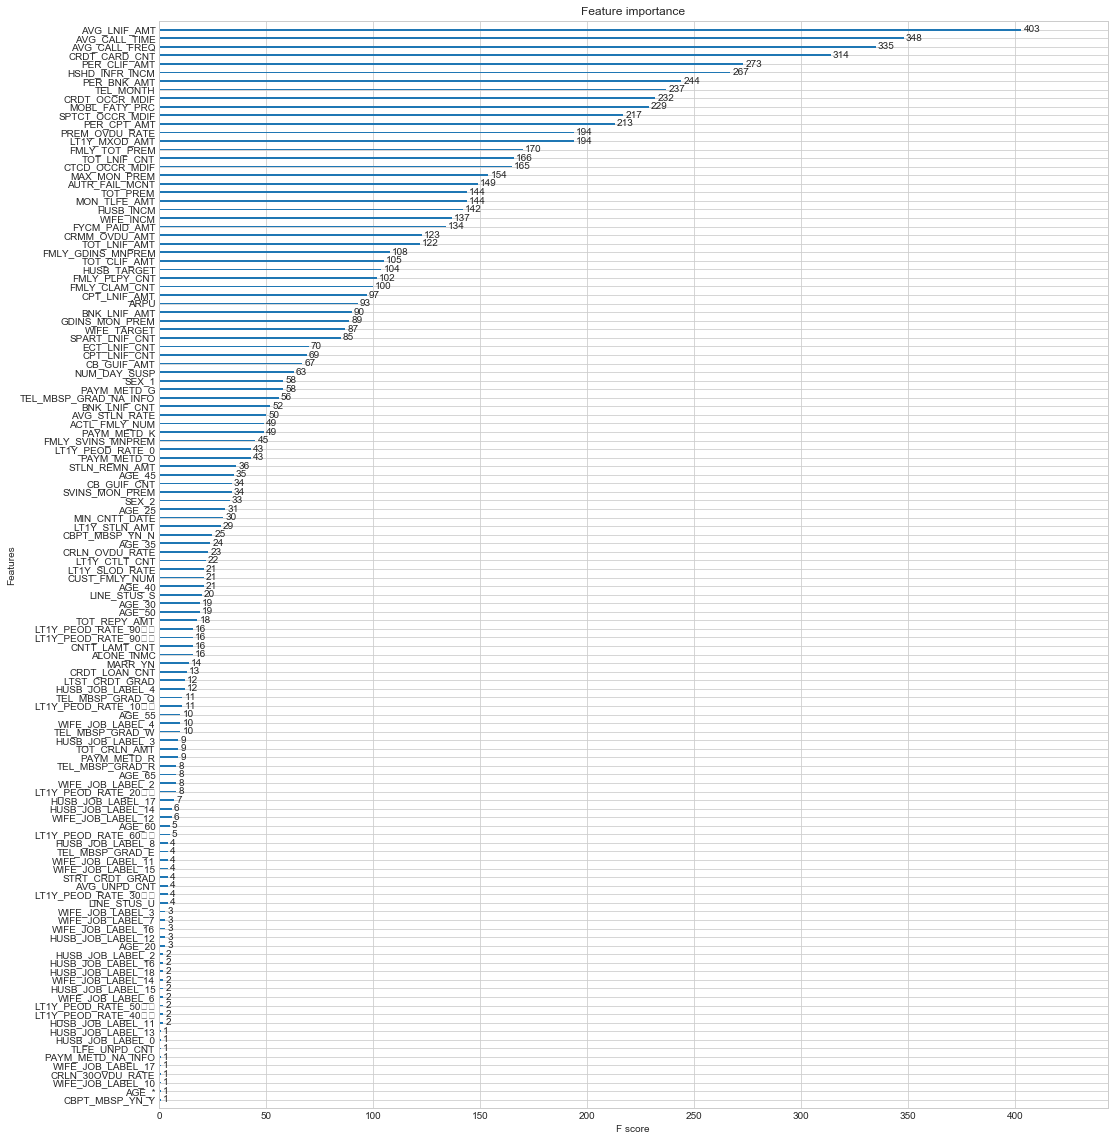

In [138]:
fig, ax = plt.subplots(figsize=(17,20))
xgb.plot_importance(xgb_model,height=0.2, ax = ax)

In [139]:
a = xgb_model.get_score(importance_type='gain')
a = a.keys()
a = list(a)
len(a)

126

In [140]:
X_test = xgb.DMatrix(X_test)

In [141]:
pred_y = xgb_model.predict(X_test)

In [144]:
fpr_rf, tpr_rf, _ = roc_curve(y_test, pred_y)

In [146]:
pred_xgb= pd.DataFrame(pred_y ,columns=['y'])
f1score(pred_xgb , y_test)

threshold of max_f1score : 0.23800000000000018 
1) accuracy_score : 0.9517538608883036 
2) recall_score : 0.49023255813953487 
3) f1_score : 0.4657534246575342


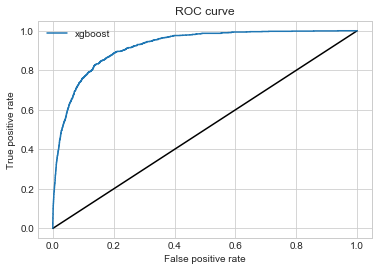

In [147]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k')
plt.plot(fpr_rf, tpr_rf, label='xgboost')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()